In [185]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [186]:
my_cols=['c1','c2','c3','c4','c5','c6','c7','c8','c9']
with open('../data/sample-laser-radar-measurement-data-1.txt') as f:
    table = pd.read_table(f, sep='\t', header=None, names=my_cols, lineterminator='\n')
    
laser_df = table[table['c1']=='L']
del laser_df['c9']
del laser_df['c1']
laser_df.columns = ['x','y','timestamp','gpx','gpy','gvx','gvy']

radar_df = table[table['c1']=='R']
del radar_df['c1']
radar_df.columns = ['rho','phi','rho_dot','timestamp','gpx','gpy','gvx','gvy']

In [187]:
laser_df.head(5)

,x,y,timestamp,gpx,gpy,gvx,gvy
1,8.44818,0.251553,1.477010e+15,8.45,0.25,-3.00027,0.00000
3,8.45582,0.253997,1.477010e+15,8.45,0.25,0.00000,0.00000
5,8.23962,0.249160,1.477010e+15,8.25,0.25,-1.81978,0.00000
7,7.84073,0.159858,1.477010e+15,7.85,0.15,-3.99972,-0.99993
9,7.54016,0.159641,1.477010e+15,7.55,0.15,-2.99982,0.00000


In [188]:
radar_df.head(5)

,rho,phi,rho_dot,timestamp,gpx,gpy,gvx,gvy
0,8.46642,0.028760,-3.040350,1.477010e+15,8.60,0.25,-3.00029,0.00000
2,8.57101,0.028232,-0.010526,1.477010e+15,8.45,0.25,0.00000,0.00000
4,8.42927,0.030143,-1.858130,1.477010e+15,8.35,0.25,-1.81979,0.00000
6,7.93510,0.023744,-3.810770,1.477010e+15,8.05,0.20,-3.99976,-0.99994
8,7.61428,0.020465,-3.220520,1.477010e+15,7.70,0.15,-2.99982,0.00000


In [189]:
xdata=np.array(laser_df['x'].values)
gpxdata=np.array(laser_df['gpx'].values)
vxdata=gpxdata-xdata
ydata=np.array(laser_df['y'].values)
gpydata=np.array(laser_df['gpy'].values)
vydata=gpydata-ydata

In [190]:
def calc_hx(gpx,gpy,gvx,gvy):
    if gpx == 0:
        return 0,0,0
    rho = math.sqrt(gpx*gpx + gpy*gpy)
    phi = math.atan(gpy/gpx)
    rho_dot = (gpx*gvx + gpy*gvy)/rho
    return np.array([rho,phi,rho_dot])

In [191]:
calc_hx(2.098967,0.052223,2.195949,0.109339)

array([ 2.09961656,  0.0248752 ,  2.19798918])

In [192]:
calc_hx(0,0,0,0)

(0, 0, 0)

In [203]:
ghs=[ np.hstack([z[0],z[1],z[2],calc_hx(z[3],z[4],z[5],z[6])]) for z in radar_df.as_matrix(['rho','phi','rho_dot','gpx', 'gpy', 'gvx', 'gvy'])]

gr_df = pd.DataFrame(ghs)
gr_df.columns = ['rho','phi','rho_dot','grho','gphi','grho_dot']
vrhodata=np.array(gr_df['grho'].values -gr_df['rho'].values)
vphidata=np.array(gr_df['gphi'].values -gr_df['phi'].values)
vrhodotdata=np.array(gr_df['grho_dot'].values -gr_df['rho_dot'].values)
gr_df
# radarg_df=pd.concat([radar_df, gr_df], right_index=True, left_index=True)
# radarg_df

,rho,phi,rho_dot,grho,gphi,grho_dot
0,8.46642,0.028760,-3.040350,8.603633,2.906158e-02,-2.999023
1,8.57101,0.028232,-0.010526,8.453697,2.957717e-02,0.000000
2,8.42927,0.030143,-1.858130,8.353742,2.993118e-02,-1.818975
3,7.93510,0.023744,-3.810770,8.052484,2.483961e-02,-4.023362
4,7.61428,0.020465,-3.220520,7.701461,1.947806e-02,-2.999251
5,7.50876,0.012703,-1.897650,7.450671,1.342215e-02,-1.828527
6,7.20598,0.000684,-2.795360,7.200000,1.319374e-07,-2.728510
7,6.74737,-0.021222,-1.670690,6.951619,-2.157938e-02,-1.779307
8,6.67866,-0.051930,-2.023790,6.759068,-5.180531e-02,-1.894473
9,6.63205,-0.084090,-0.814970,6.622877,-8.314108e-02,-0.829487


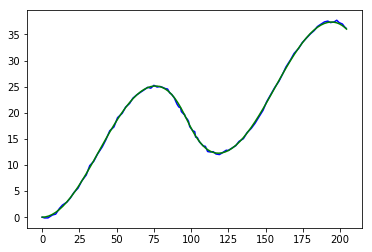

In [99]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(gpxdata, gpydata, 'g-', label='gt')

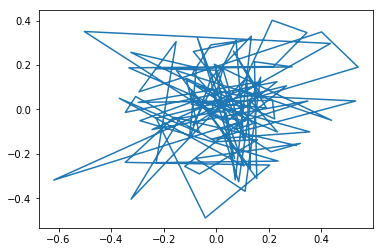

In [100]:
plt.plot(vxdata,vydata)

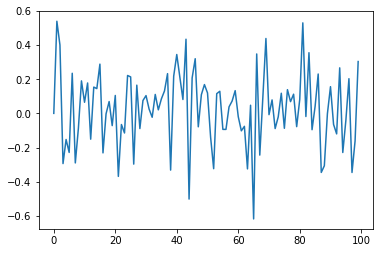

In [101]:
plt.plot(vxdata)

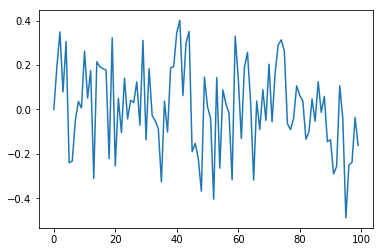

In [102]:
plt.plot(vydata)

In [103]:
np.cov(np.vstack((xdata,gpxdata)))

array([[ 3183.5714091 ,  3183.00285351],
       [ 3183.00285351,  3182.48225559]])

In [104]:
hist, bin_edges = np.histogram(xdata, density=True)

In [105]:
hist

array([ 0.00441197,  0.00392175,  0.00392175,  0.00441197,  0.00882394,
        0.00637284,  0.00392175,  0.00392175,  0.00392175,  0.00539241])

(array([  1.,   3.,   9.,   9.,  24.,  30.,  53.,  65.,  64.,  72.,  86.,
         54.,  41.,  42.,  21.,  17.,  18.,   2.,   0.,   1.]),
 array([-0.03049  , -0.0273935, -0.024297 , -0.0212005, -0.018104 ,
        -0.0150075, -0.011911 , -0.0088145, -0.005718 , -0.0026215,
         0.000475 ,  0.0035715,  0.006668 ,  0.0097645,  0.012861 ,
         0.0159575,  0.019054 ,  0.0221505,  0.025247 ,  0.0283435,  0.03144  ]),
 <a list of 20 Patch objects>)

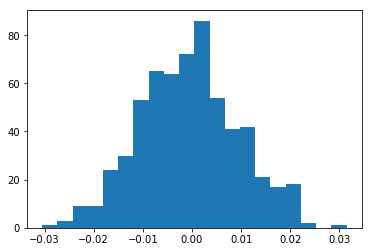

In [202]:
plt.hist(vydata, bins='auto')

In [208]:
np.var(vxdata),np.var(vydata)

(0.00010514691201033777, 0.00010193598986578901)

In [209]:
np.var(vrhodata),np.var(vphidata),np.var(vrhodotdata)

(0.010369618168272726, 1.0680397690973507e-06, 0.011294795278015999)